In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

# Problem 1

In [4]:
x,y = make_classification(n_samples = 1000,n_classes = 2,n_features = 20,random_state = 27)
print(x,y)

[[-0.25820289  1.0198078   1.52456317 ...  0.33272104 -0.17540696
   1.50112422]
 [-0.45816647  0.82872793 -0.65696499 ...  1.2019375  -0.25583476
  -0.19931278]
 [-0.3873777   0.76181785 -1.31035138 ... -1.0332091  -1.68667137
  -0.76683607]
 ...
 [-0.54779315 -0.67453913 -0.83464431 ...  0.57821623 -1.17254773
   1.08301901]
 [ 0.5596188  -0.62502523  1.40453753 ... -1.66951495 -0.29276041
   0.48456871]
 [-1.42487559  0.52714552  0.15786417 ...  3.25163637 -0.54779104
  -1.51033252]] [1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [6]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 20) (800, 20) (200, 20)


In [7]:
print(y.shape,y_train.shape,y_test.shape)

(1000,) (800,) (200,)


In [8]:

regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [9]:
pred_test = regressor.predict(x_train)
accuracy = accuracy_score(pred_test,y_train)
accuracy

0.9525

In [10]:
pred_test1 = regressor.predict(x_test)
accuracy1 = accuracy_score(pred_test1,y_test)
accuracy1

0.95

In [11]:
pred_test = regressor.predict_proba(x_test)
pred_test

array([[2.24839281e-01, 7.75160719e-01],
       [3.36978061e-02, 9.66302194e-01],
       [9.40045998e-01, 5.99540022e-02],
       [1.42861827e-03, 9.98571382e-01],
       [9.99620328e-01, 3.79672247e-04],
       [9.26877173e-01, 7.31228270e-02],
       [3.06375344e-02, 9.69362466e-01],
       [9.98879370e-01, 1.12062964e-03],
       [2.11946707e-02, 9.78805329e-01],
       [9.82413580e-01, 1.75864205e-02],
       [9.68569875e-01, 3.14301250e-02],
       [9.68858446e-01, 3.11415537e-02],
       [2.03363779e-04, 9.99796636e-01],
       [8.63049351e-01, 1.36950649e-01],
       [9.10021359e-01, 8.99786409e-02],
       [5.64748592e-06, 9.99994353e-01],
       [9.95548910e-01, 4.45108980e-03],
       [2.14213792e-02, 9.78578621e-01],
       [9.16195861e-01, 8.38041394e-02],
       [2.38903867e-02, 9.76109613e-01],
       [1.23295562e-01, 8.76704438e-01],
       [9.98995119e-01, 1.00488117e-03],
       [9.94215798e-01, 5.78420181e-03],
       [9.68582182e-01, 3.14178177e-02],
       [2.236928

In [12]:
fpr1, tpr1,thresh1 = roc_curve(y_test,pred_test[:,1],pos_label = 1)

In [13]:
random_probs = [0 for i in range(len(y_test))]
p_fpr,p_tpr, _= roc_curve(y_test,random_probs,pos_label=1)

In [14]:
auc_score = roc_auc_score(y_test,pred_test[:,1])
print("The AUC Score is",auc_score)

The AUC Score is 0.9852


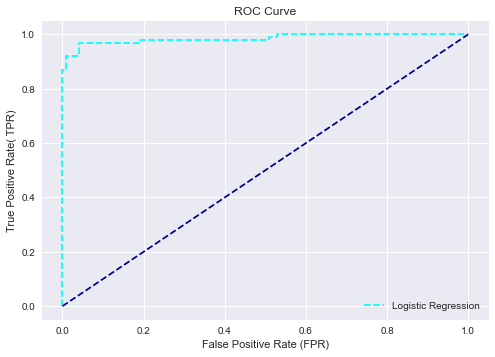

In [22]:
plt.style.use('seaborn')

plt.plot(fpr1,tpr1,linestyle='--',color='cyan',label='Logistic Regression')
plt.plot(p_fpr,p_tpr,linestyle='--',color='darkblue')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel("True Positive Rate( TPR)")
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

# Problem 2

In [17]:
data = KNeighborsClassifier(n_neighbors = 4)
data.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
pred_test1 = data.predict_proba(x_test)
fpr2, tpr2, thres2 = roc_curve(y_test,pred_test1[:,1],pos_label=1)

In [19]:
random_probs1 = [0 for i in range(len(y_test))]
p_fpr1,p_tpr1, _1= roc_curve(y_test,random_probs1,pos_label=1)

In [20]:
auc_score1 = roc_auc_score(y_test,pred_test1[:,1])
print("The AUC Score is",auc_score1)

The AUC Score is 0.94645


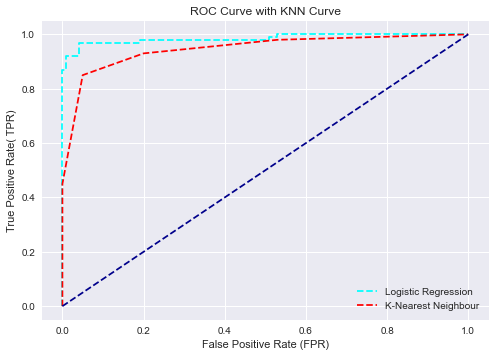

In [24]:
# Plotting the ROC between FPR and TPR and for TPR = FPR
plt.style.use('seaborn')

# plotting the roc curve
plt.plot(fpr1,tpr1,linestyle='--',color='cyan',label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='--',color='red',label='K-Nearest Neighbour')
plt.plot(p_fpr1,p_tpr1,linestyle='--',color='darkblue')
plt.title("ROC Curve with KNN Curve")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel("True Positive Rate( TPR)")
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

# Problem 3

In [25]:
a, b = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative = 3,random_state=27)

In [26]:
print(a)

[[ 1.12159194 -0.82297249 -0.70074625 ... -0.40222494  1.79156831
  -0.44655183]
 [ 0.72644275  0.23939144 -0.87907103 ...  0.22339294  1.59626839
  -1.7900913 ]
 [ 0.55724738  0.14110425  0.45031313 ... -0.45703991  1.66344818
   0.7601742 ]
 ...
 [ 0.79981279 -1.18494752 -0.19461573 ...  1.26595128  1.36804308
   1.14027385]
 [-0.81789961 -0.73578299 -1.04611335 ... -0.65323387  1.79987097
  -0.59374931]
 [ 0.18247397 -0.80346931 -2.51154582 ...  0.38063857  1.16343864
  -0.23075671]]


In [27]:
print(b)

[1 1 0 2 0 1 2 0 0 1 2 2 0 2 1 0 1 0 0 2 2 2 2 1 2 1 1 1 0 0 0 0 2 2 2 0 2
 1 2 0 0 1 1 2 1 0 1 2 0 2 1 2 2 1 1 2 0 0 2 0 2 1 0 0 1 2 1 1 0 2 0 1 1 2
 1 1 0 2 0 2 1 1 2 0 1 1 0 2 1 1 0 0 1 2 0 0 2 0 0 0 0 0 2 2 2 0 2 1 1 1 1
 0 1 2 1 0 1 0 2 2 1 2 2 0 1 1 0 1 2 2 2 0 2 1 1 2 0 1 0 2 2 0 2 2 1 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 2 2 2 2 0 0 2 2 0 2 0 2 1 1 0 2 1 1 2 0 2 1 2 0 1
 2 0 2 0 2 0 0 2 2 2 2 2 0 2 1 2 0 0 0 0 2 1 0 1 1 0 2 0 2 0 2 0 1 0 0 2 1
 2 0 2 1 2 1 0 2 2 0 1 1 0 2 2 2 0 2 2 1 0 0 0 0 1 1 2 1 0 0 2 1 2 1 2 0 0
 2 0 1 1 2 1 2 0 2 0 0 1 1 1 0 2 0 0 0 1 0 0 2 0 1 1 0 0 1 0 0 1 0 0 1 0 1
 2 2 1 0 0 0 2 0 1 1 2 1 1 1 1 2 2 0 0 0 1 0 1 0 1 0 0 1 1 0 1 2 1 2 1 0 2
 1 2 2 0 1 2 2 2 1 0 2 0 1 0 2 0 1 1 2 1 0 2 0 0 0 1 1 1 2 1 2 1 0 0 1 2 0
 0 2 1 0 1 2 2 0 1 1 1 0 0 1 2 1 1 2 0 0 1 2 2 2 2 0 2 0 1 2 0 0 2 2 0 0 1
 2 0 1 1 2 1 2 0 1 2 0 0 2 1 2 0 0 1 2 2 0 2 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0
 2 0 2 1 1 2 1 1 1 0 0 2 1 2 1 1 2 2 0 1 1 2 1 1 1 2 2 0 0 2 2 1 2 1 0 1 0
 0 0 2 0 1 1 1 1 2 0 2 1 

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(a,b,test_size=0.2,random_state = 2)

In [29]:
model1 = OneVsRestClassifier(LogisticRegression())
model1.fit(xtrain,ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [30]:
pred_prob1 = model1.predict_proba(xtest)
pred_prob1

array([[0.14171399, 0.50518162, 0.35310439],
       [0.11934561, 0.74142577, 0.13922862],
       [0.47862992, 0.05879915, 0.46257093],
       [0.12448709, 0.73681531, 0.1386976 ],
       [0.20456965, 0.50851804, 0.2869123 ],
       [0.01534588, 0.82098611, 0.16366801],
       [0.06878507, 0.73379372, 0.1974212 ],
       [0.3602329 , 0.01966737, 0.62009973],
       [0.0427006 , 0.76855965, 0.18873975],
       [0.17973537, 0.56942953, 0.2508351 ],
       [0.10179473, 0.58377279, 0.31443249],
       [0.58373795, 0.03023349, 0.38602856],
       [0.14365668, 0.4608991 , 0.39544423],
       [0.16834383, 0.54982853, 0.28182764],
       [0.53436328, 0.16357087, 0.30206585],
       [0.11012268, 0.53278796, 0.35708936],
       [0.06266363, 0.7253277 , 0.21200867],
       [0.12392848, 0.44299113, 0.43308039],
       [0.12942472, 0.66205114, 0.20852413],
       [0.35588562, 0.38299635, 0.26111802],
       [0.42138023, 0.32459937, 0.2540204 ],
       [0.23977709, 0.51097885, 0.24924406],
       [0.

In [31]:
fpr3 = {}
tpr3 = {}
thres3 = {}
roc_auc = {}

In [32]:
n_classes = 3
for i in range(n_classes):
    fpr3[i],tpr3[i],thres3[i] = roc_curve(ytest,pred_prob1[:,i],pos_label=i)
    roc_auc[i] = auc(fpr3[i],tpr3[i])
print(roc_auc)

{0: 0.8097292632941431, 1: 0.888961677038978, 2: 0.6065228174603174}


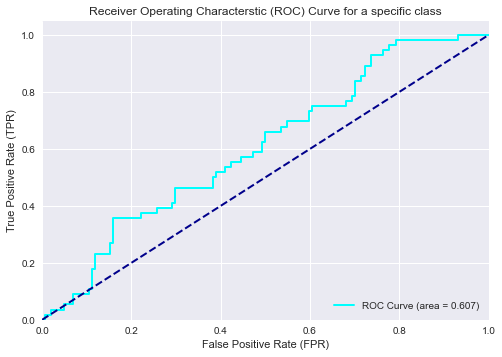

In [33]:
plt.figure()
x = 2
plt.plot(fpr3[2],tpr3[2],color='cyan',lw = x,label = "ROC Curve (area = %0.3f)" %roc_auc[2])
plt.plot([0,1],[0,1],color = 'darkblue',lw = x,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstic (ROC) Curve for a specific class')
plt.legend(loc='lower right')
plt.show()